In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#load the data set
df = pd.read_csv('delhi_aqi.csv', sep=',')
pollutants_to_check = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'no', 'nh3']
for col in pollutants_to_check:
    df.loc[df[col] < 0, col] = np.nan

df = df.fillna(df.median(numeric_only=True))
#declaring all the lower and upper bounds of the pollutant levels as per the central pollution control board.
pm25_bp = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 350, 401, 500), (351, 1800, 501, 1000)]
pm10_bp = [(0, 50, 0, 50), (51,100,51,100), (101,250,101,200), (251,350,201,300),(351,430,301,400), (431,500,401,500), (501, 2000, 501, 1000)]
no2_bp = [(0,40,0,50), (41,80,51,100), (81,180,101,200), (181,280,201,300),(281,400,301,400), (401,1000,401,500)]
so2_bp = [(0,40,0,50), (41,80,51,100), (81,380,101,200), (381,800,201,300),(801,1600,301,400), (1601,2000,401,500)]
co_bp = [(0, 1000, 0, 50), (1001, 2000, 51, 100), (2001, 10000, 101, 200),(10001, 17000, 201, 300), (17001, 34000, 301, 400), (34001, 50000, 401, 500)]
o3_bp = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300),(209, 748, 301, 400), (749, 1000, 401, 500)]

def calc_subindex(conc, bp_list):
    for (low_bp, high_bp, low_aqi, high_aqi) in bp_list:
        if low_bp <= conc <= high_bp:
            return ((high_aqi - low_aqi)/(high_bp - low_bp)) * (conc - low_bp) + low_aqi
    return np.nan

df['AQI_PM25'] = df['pm2_5'].apply(lambda x: calc_subindex(x, pm25_bp))
df['AQI_PM10'] = df['pm10'].apply(lambda x: calc_subindex(x, pm10_bp))
df['AQI_NO2'] = df['no2'].apply(lambda x: calc_subindex(x, no2_bp))
df['AQI_SO2'] = df['so2'].apply(lambda x: calc_subindex(x, so2_bp))
df['AQI_CO'] = df['co'].apply(lambda x: calc_subindex(x, co_bp))
df['AQI_O3'] = df['o3'].apply(lambda x: calc_subindex(x, o3_bp))

aqi_cols = ['AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3']
df['Net_AQI'] = df[aqi_cols].max(axis=1)

df["co"]=df["co"]/1000

df.to_excel('delhi_aqi_processed.xlsx', index=False)
df_norm = pd.read_excel("delhi_aqi_processed.xlsx")
columns_to_normalize = [col for col in df_norm.columns if col not in ['date', 'Net_AQI']]
scaler = MinMaxScaler()
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize])
df_norm.to_csv("delhi_aqi_minmax_normalized.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('delhi_aqi.csv', sep=',')

pollutants_to_check = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'no', 'nh3']
for col in pollutants_to_check:
    df.loc[df[col] < 0, col] = np.nan

df = df.fillna(df.median(numeric_only=True))

pm25_bp = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 350, 401, 500), (351, 1800, 501, 1000)]
pm10_bp = [(0, 50, 0, 50), (51,100,51,100), (101,250,101,200), (251,350,201,300),(351,430,301,400), (431,500,401,500), (501, 2000, 501, 1000)]
no2_bp = [(0,40,0,50), (41,80,51,100), (81,180,101,200), (181,280,201,300),(281,400,301,400), (401,1000,401,500)]
so2_bp = [(0,40,0,50), (41,80,51,100), (81,380,101,200), (381,800,201,300),(801,1600,301,400), (1601,2000,401,500)]
co_bp = [(0, 1000, 0, 50), (1001, 2000, 51, 100), (2001, 10000, 101, 200),(10001, 17000, 201, 300), (17001, 34000, 301, 400), (34001, 50000, 401, 500)]
o3_bp = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300),(209, 748, 301, 400), (749, 1000, 401, 500)]

def calc_subindex(conc, bp_list):
    for (low_bp, high_bp, low_aqi, high_aqi) in bp_list:
        if low_bp <= conc <= high_bp:
            return ((high_aqi - low_aqi)/(high_bp - low_bp)) * (conc - low_bp) + low_aqi
    return np.nan

df['AQI_PM25'] = df['pm2_5'].apply(lambda x: calc_subindex(x, pm25_bp))
df['AQI_PM10'] = df['pm10'].apply(lambda x: calc_subindex(x, pm10_bp))
df['AQI_NO2'] = df['no2'].apply(lambda x: calc_subindex(x, no2_bp))
df['AQI_SO2'] = df['so2'].apply(lambda x: calc_subindex(x, so2_bp))
df['AQI_CO'] = df['co'].apply(lambda x: calc_subindex(x, co_bp))
df['AQI_O3'] = df['o3'].apply(lambda x: calc_subindex(x, o3_bp))

aqi_cols = ['AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3']
df['Net_AQI'] = df[aqi_cols].max(axis=1)

df["co"]=df["co"]/1000

df.to_excel('delhi_aqi_processed.xlsx', index=False)

df_norm = pd.read_excel("delhi_aqi_processed.xlsx")

columns_to_normalize = [col for col in df_norm.columns if col not in ['date', 'Net_AQI']]

scaler = MinMaxScaler()

df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize])

df_norm.to_csv("delhi_aqi_minmax_normalized.csv", index=False)

print(df.head())

               date       co     no     no2     o3    so2   pm2_5    pm10  \
0  25-11-2020 01:00  2.61688   2.18   70.60  13.59  38.62  364.61  411.73   
1  25-11-2020 02:00  3.63159  23.25   89.11   0.33  54.36  420.96  486.21   
2  25-11-2020 03:00  4.53949  52.75  100.08   1.11  68.67  463.68  541.95   
3  25-11-2020 04:00  4.53949  50.96  111.04   6.44  78.20  454.81  534.00   
4  25-11-2020 05:00  4.37927  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3    AQI_PM25    AQI_PM10     AQI_NO2     AQI_SO2      AQI_CO  AQI_O3  \
0  28.63  505.686950  377.104684   88.189744   48.275000  108.622468   13.59   
1  41.04  525.092505  480.214348  109.110000   67.785641  121.181074    0.33   
2  49.14  539.804224  514.631788  120.080000   85.764872  132.417741    1.11   
3  48.13  536.749614  511.985324  131.040000   97.738462  132.417741    6.44   
4  46.61  534.452629  510.384129  137.900000  103.231639  130.434771   17.17   

      Net_AQI  
0  505.686950  
1  525.092505  
2  539.8

/tmp/ipython-input-4280729626.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


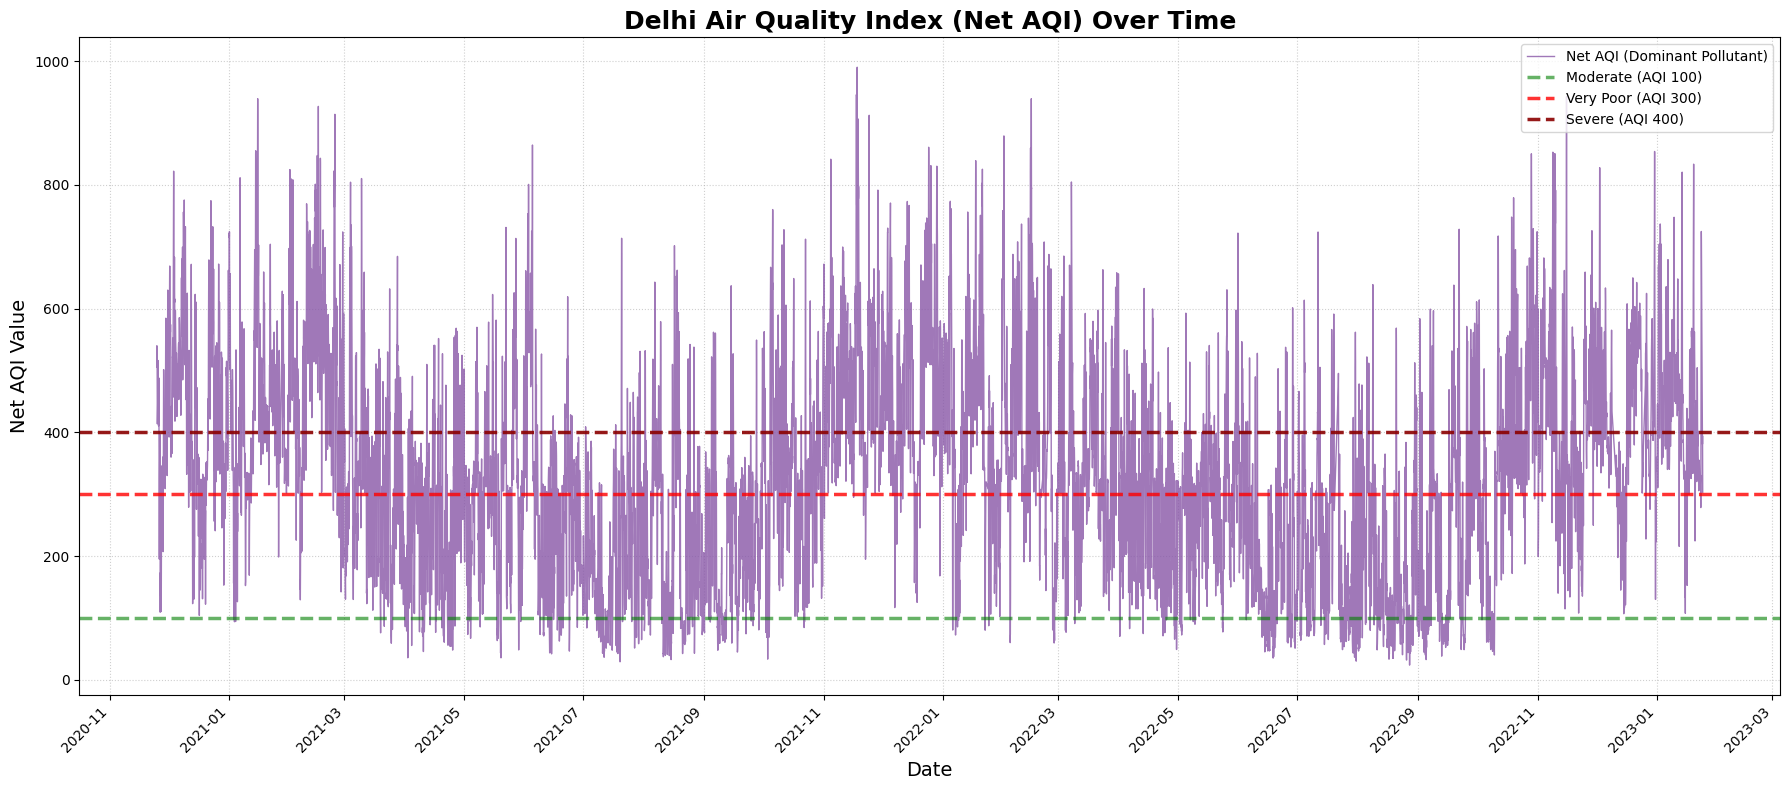

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

df = pd.read_excel('delhi_aqi_processed.xlsx')

df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')

plt.figure(figsize=(18, 8))

plt.plot(df.index, df['Net_AQI'],label='Net AQI (Dominant Pollutant)',color='#8856a7',linewidth=1.0,alpha=0.8)
plt.axhline(y=100, color='green', linestyle='--', alpha=0.6, label='Moderate (AQI 100)', linewidth=2.5)
plt.axhline(y=300, color='red', linestyle='--', alpha=0.8, label='Very Poor (AQI 300)', linewidth=2.5)
plt.axhline(y=400, color='darkred', linestyle='--', alpha=0.9, label='Severe (AQI 400)', linewidth=2.5)

plt.title('Delhi Air Quality Index (Net AQI) Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Net AQI Value', fontsize=14)

locator = mdates.MonthLocator(interval=2)
formatter = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3817556865.py:40: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration ($\mu g/m^3$ or $mg/m^3$)', fontsize=12)
/tmp/ipython-input-3817556865.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


1.Comprehensive Descriptive Statistics (All Variables)
            count    mean     std    min     25%     50%     75%      max
co        18776.0    2.93    2.85   0.26    1.07    1.84    3.68    21.15
no        18776.0   33.66   62.13   0.00    0.68    5.25   35.76   500.68
no2       18776.0   66.22   48.53   4.28   33.93   54.15   83.63   460.62
o3        18776.0   60.35   80.46   0.00    0.34   27.18   92.98   801.09
so2       18776.0   66.69   49.44   5.25   34.81   52.93   82.02   579.83
pm2_5     18776.0  238.13  226.53  11.83   84.44  157.44  313.00  1708.09
pm10      18776.0  300.09  267.17  15.07  118.80  209.70  387.96  1969.93
nh3       18776.0   25.11   26.40   0.00    9.63   17.48   30.40   287.77
AQI_PM25  18434.0  332.71  180.27  19.72  184.57  330.90  466.31   968.35
AQI_PM10  18607.0  249.16  188.59  15.07  113.41  173.34  348.93   989.99
AQI_NO2   18322.0   79.35   52.98   5.35   41.55   67.52  104.31   410.85
AQI_SO2   18367.0   71.75   34.14   6.56   42.91   66.59 

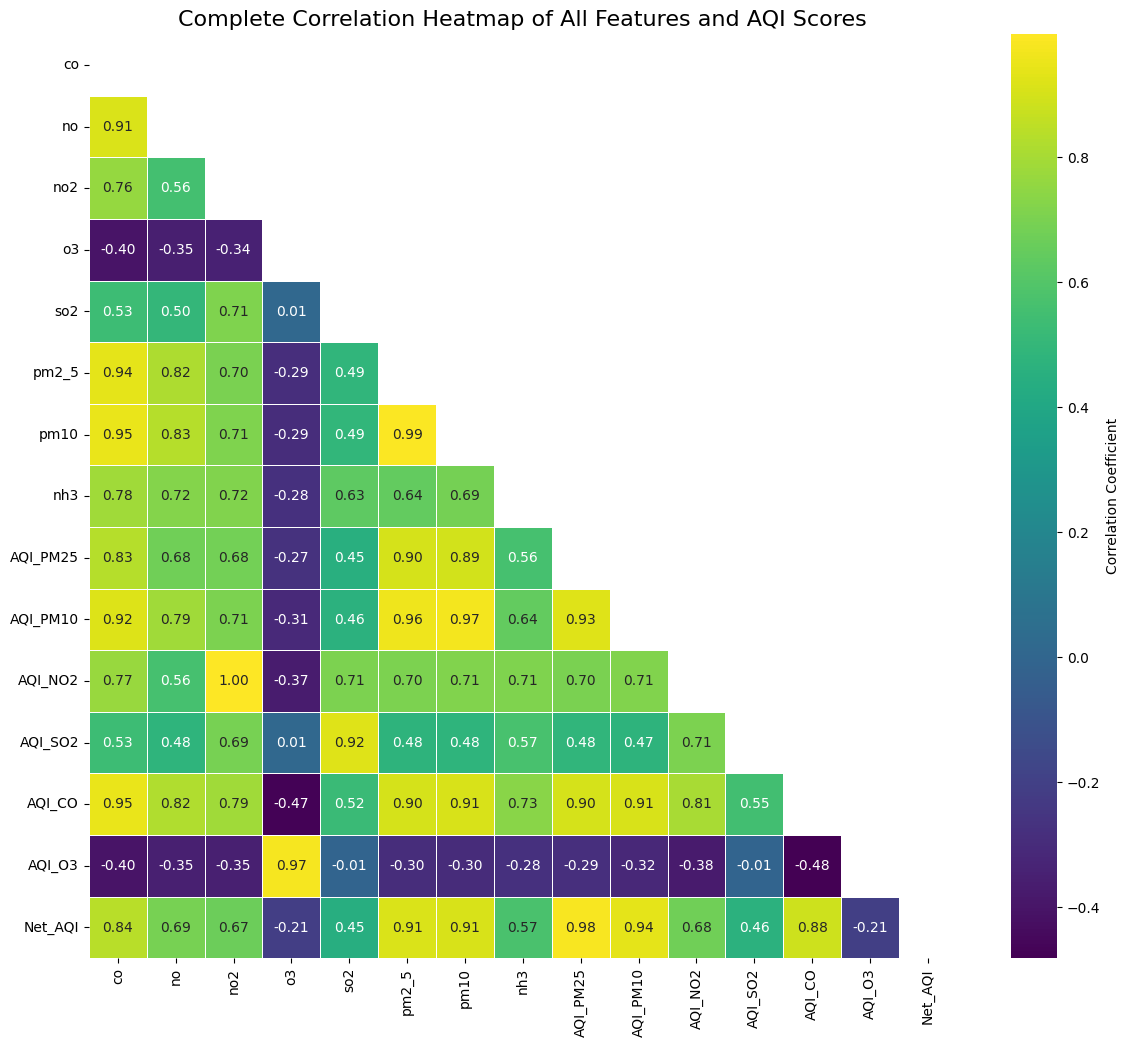

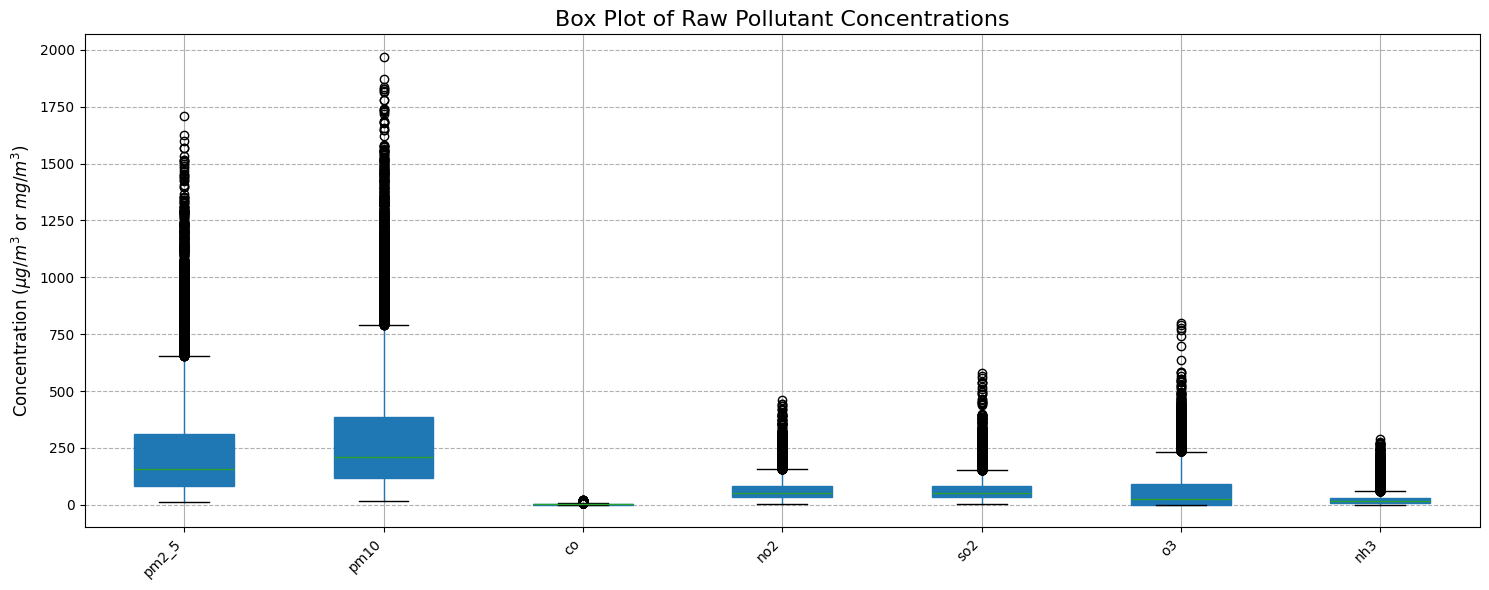

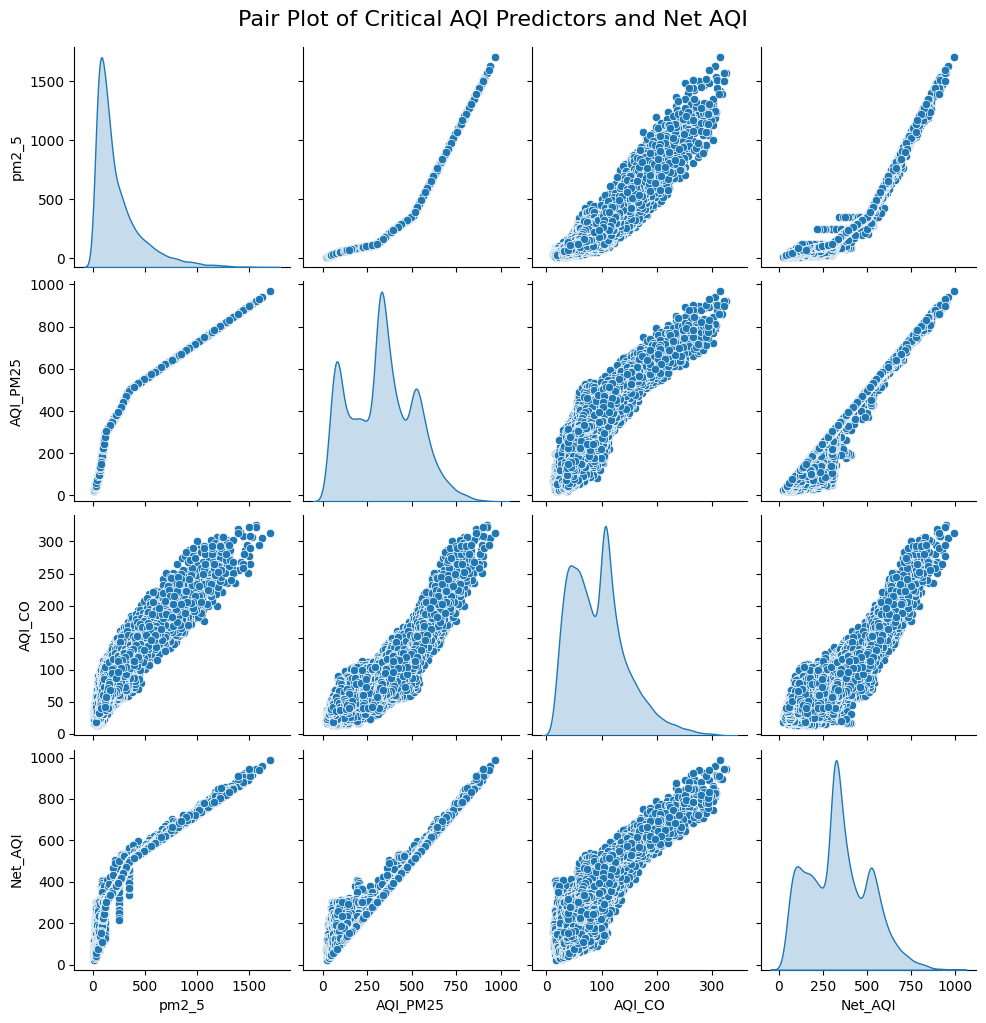

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('delhi_aqi_processed.xlsx')

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

print("1.Comprehensive Descriptive Statistics (All Variables)")
print(df.describe().T.round(2))
print(" 2. Complete Correlation Matrix (Heatmap)")

correlation_cols = df.columns.tolist()

corr_matrix = df[correlation_cols].corr()

net_aqi_corr = corr_matrix['Net_AQI'].sort_values(ascending=False).round(3)
print("Correlation with Net_AQI:", net_aqi_corr)

plt.figure(figsize=(14, 12))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix,mask=mask,annot=True,fmt=".2f",cmap='viridis',cbar_kws={'label': 'Correlation Coefficient'},linewidths=0.5,linecolor='white'
)
plt.title('Complete Correlation Heatmap of All Features and AQI Scores', fontsize=16)
plt.show()
pollutant_cols = ['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3', 'nh3']
plt.figure(figsize=(15, 6))
df[pollutant_cols].boxplot(patch_artist=True)
plt.title('Box Plot of Raw Pollutant Concentrations', fontsize=16)
plt.ylabel('Concentration ($\mu g/m^3$ or $mg/m^3$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


#print all the data in graphs
critical_cols = ['pm2_5', 'AQI_PM25', 'AQI_CO', 'Net_AQI']

# df_sample = df[critical_cols].sample(n=2000, random_state=42)

sns.pairplot(df[critical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Critical AQI Predictors and Net AQI', y=1.02, fontsize=16)
plt.show()